## How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\jhank\Desktop\DA7\Projects\wego-shut_up_and_take_my_query\data\Headway Data.csv")
#df = pd.read_csv(r"/home/jwhankins177/projects/wego/data/Headway Data.csv")

In [5]:
df.tail(10)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
1981705,120221101,1,91057372,2022-11-01,50,8601,2600,329896,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,23,9.166666
1981706,120221101,1,91057373,2022-11-01,50,8601,2600,329896,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,24,9.416666
1981707,120221101,1,91057381,2022-11-01,55,8604,2374,329899,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,31.933333
1981708,120221101,1,91057382,2022-11-01,55,8604,2374,329899,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,0.000000
1981709,120221101,1,91057723,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,20.916666
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,19.366666
1981714,120221101,1,91057882,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,1.683333


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CALENDAR_ID                int64  
 1   SERVICE_ABBR               int64  
 2   ADHERENCE_ID               int64  
 3   DATE                       object 
 4   ROUTE_ABBR                 int64  
 5   BLOCK_ABBR                 int64  
 6   OPERATOR                   int64  
 7   TRIP_ID                    int64  
 8   OVERLOAD_ID                int64  
 9   ROUTE_DIRECTION_NAME       object 
 10  TIME_POINT_ABBR            object 
 11  ROUTE_STOP_SEQUENCE        float64
 12  TRIP_EDGE                  int64  
 13  LATITUDE                   float64
 14  LONGITUDE                  float64
 15  SCHEDULED_TIME             object 
 16  ACTUAL_ARRIVAL_TIME        object 
 17  ACTUAL_DEPARTURE_TIME      object 
 18  ADHERENCE                  float64
 19  SCHEDULED_HDWY             float64
 20  AC

#### Create a dataframe containing relevant info.

In [7]:
time = df[['OPERATOR','ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT']]
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 4 columns):
 #   Column                 Dtype
---  ------                 -----
 0   OPERATOR               int64
 1   ADJUSTED_ONTIME_COUNT  int64
 2   ADJUSTED_EARLY_COUNT   int64
 3   ADJUSTED_LATE_COUNT    int64
dtypes: int64(4)
memory usage: 60.5 MB


Rename columns

In [8]:
time.columns=['operator','ontime','early','late']

In [9]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 4 columns):
 #   Column    Dtype
---  ------    -----
 0   operator  int64
 1   ontime    int64
 2   early     int64
 3   late      int64
dtypes: int64(4)
memory usage: 60.5 MB


Group by operator

In [10]:
time_gb = time.groupby(['operator'],as_index = False)['ontime','early','late'].sum()

C:\Users\jhank\AppData\Local\Temp\ipykernel_3408\1898847286.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  time_gb = time.groupby(['operator'],as_index = False)['ontime','early','late'].sum()


In [11]:
time_gb

,operator,ontime,early,late
0,0,98,1,26
1,30,0,2,0
2,85,0,1,0
3,86,24,3,1
4,93,5,0,1
...,...,...,...,...
453,2622,429,20,52
454,2623,195,2,3
455,2624,31,0,10
456,2630,190,10,28


In [12]:
time_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   operator  458 non-null    int64
 1   ontime    458 non-null    int64
 2   early     458 non-null    int64
 3   late      458 non-null    int64
dtypes: int64(4)
memory usage: 14.4 KB


Add column with total count

In [13]:
time_gb['total'] = (time_gb['ontime'] + time_gb['early'] + time_gb['late'])

In [14]:
time_gb.head()

,operator,ontime,early,late,total
0,0,98,1,26,125
1,30,0,2,0,2
2,85,0,1,0,1
3,86,24,3,1,28
4,93,5,0,1,6


Add column with avg on time rate

In [31]:
time_gb['pct_on_time'] = round((time_gb['ontime']/time_gb['total'])*100,0)


In [41]:
time_gb['pct_on_time_5'] = round((time_gb['ontime']/time_gb['total'])*100,5)

In [42]:
time_gb.head(20)


,operator,ontime,early,late,total,pct_on_time,pct_on_time_5
0,0,98,1,26,125,78.0,78.40000
1,30,0,2,0,2,0.0,0.00000
2,85,0,1,0,1,0.0,0.00000
3,86,24,3,1,28,86.0,85.71429
4,93,5,0,1,6,83.0,83.33333
5,195,14,0,6,20,70.0,70.00000
6,212,15,1,8,24,62.0,62.50000
7,230,128,0,5,133,96.0,96.24060
8,235,39,0,0,39,100.0,100.00000
9,242,1,0,0,1,100.0,100.00000


In [43]:
time_gb.describe()

,operator,ontime,early,late,total,pct_on_time,pct_on_time_5
count,458.000000,458.000000,458.000000,458.000000,458.000000,455.000000,455.000000
mean,1801.161572,3631.919214,118.491266,457.635371,4208.045852,83.298901,83.287160
std,1194.729533,3362.928216,149.761827,584.126298,3791.811515,14.487831,14.483869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1305.500000,519.500000,13.250000,53.000000,647.500000,78.000000,78.352330
50%,1906.500000,3192.000000,72.000000,253.500000,3729.000000,87.000000,86.899890
75%,2360.750000,5928.500000,168.500000,675.000000,6957.250000,92.000000,92.152190
max,22554.000000,13876.000000,1352.000000,5510.000000,15163.000000,100.000000,100.000000


In [44]:
time_pct = time_gb[['operator','pct_on_time']]

In [45]:
time_pct.head()

,operator,pct_on_time
0,0,78.0
1,30,0.0
2,85,0.0
3,86,86.0
4,93,83.0


In [46]:
time_pct = time_gb.groupby(['pct_on_time'],as_index = False)['operator'].count()

In [47]:
time_pct.head(100)

,pct_on_time,operator
0,0.0,4
1,16.0,1
2,20.0,1
3,33.0,1
4,40.0,2
5,44.0,2
6,46.0,1
7,49.0,1
8,50.0,2
9,51.0,1


<AxesSubplot:ylabel='Frequency'>

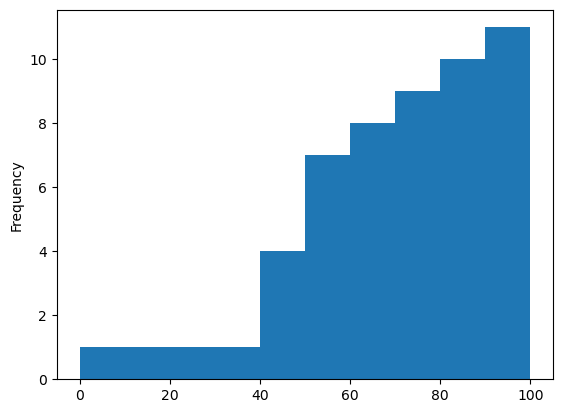

In [48]:
time_pct['pct_on_time'].plot(kind='hist')

Top and bottom ten

In [53]:
time_ten = time_gb[['operator','pct_on_time_5']]

In [67]:
time_large = time_ten.nlargest(30,'pct_on_time_5')

In [64]:
time_small = time_ten.nsmallest(10,'pct_on_time_5')

<AxesSubplot:>

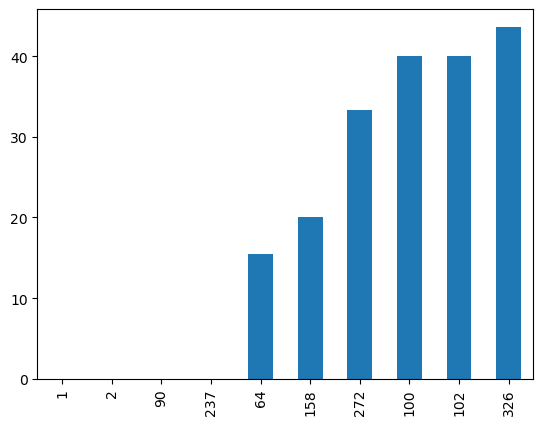

In [65]:
time_small['pct_on_time_5'].plot(kind='bar')

<AxesSubplot:>

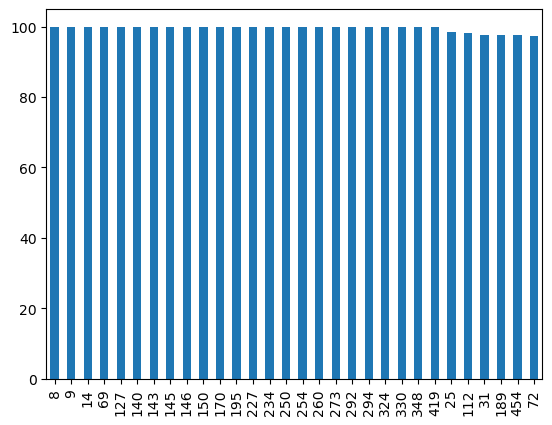

In [71]:
time_large['pct_on_time_5'].plot(kind='bar')